In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('Housing.csv')

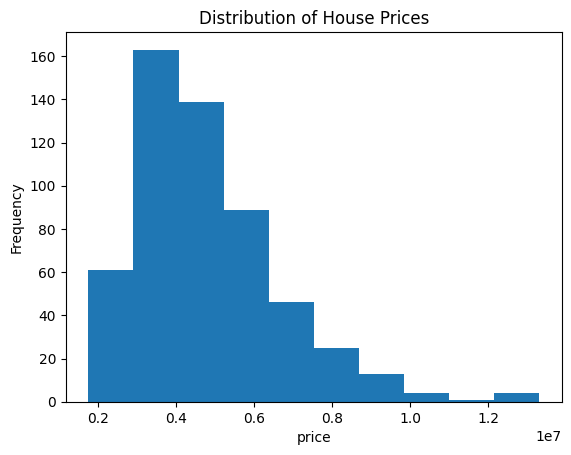

In [34]:
plt.hist(df['price'])
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

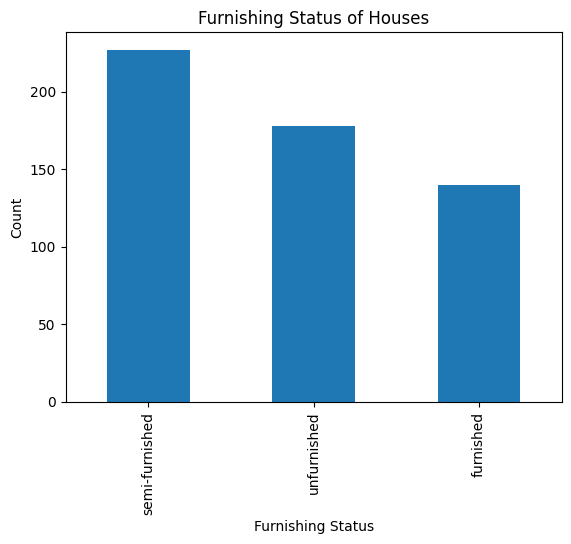

In [35]:
df['furnishingstatus'].value_counts().plot(kind='bar')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.title('Furnishing Status of Houses')
plt.show()

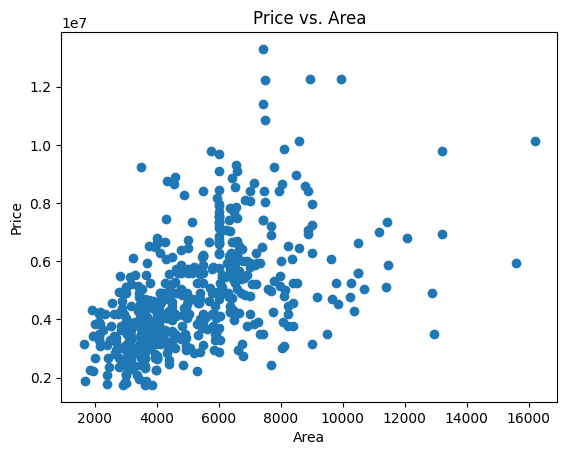

In [36]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs. Area')
plt.show()

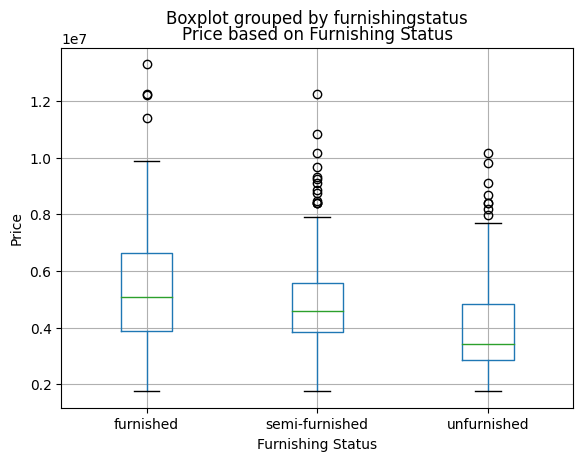

In [37]:
df.boxplot(column='price', by='furnishingstatus')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.title('Price based on Furnishing Status')
plt.show()

<ipython-input-38-b6d9f4d23413>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


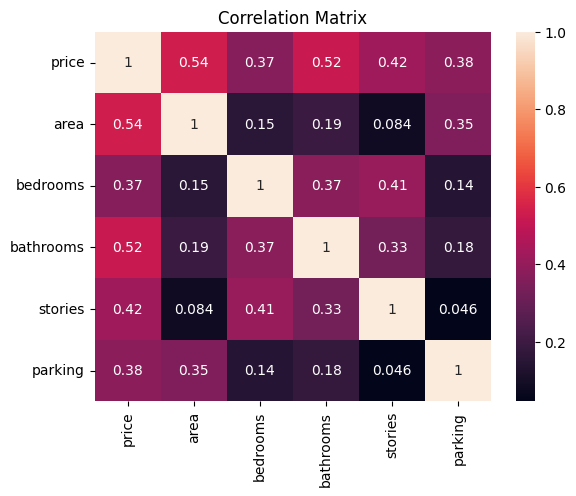

In [38]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

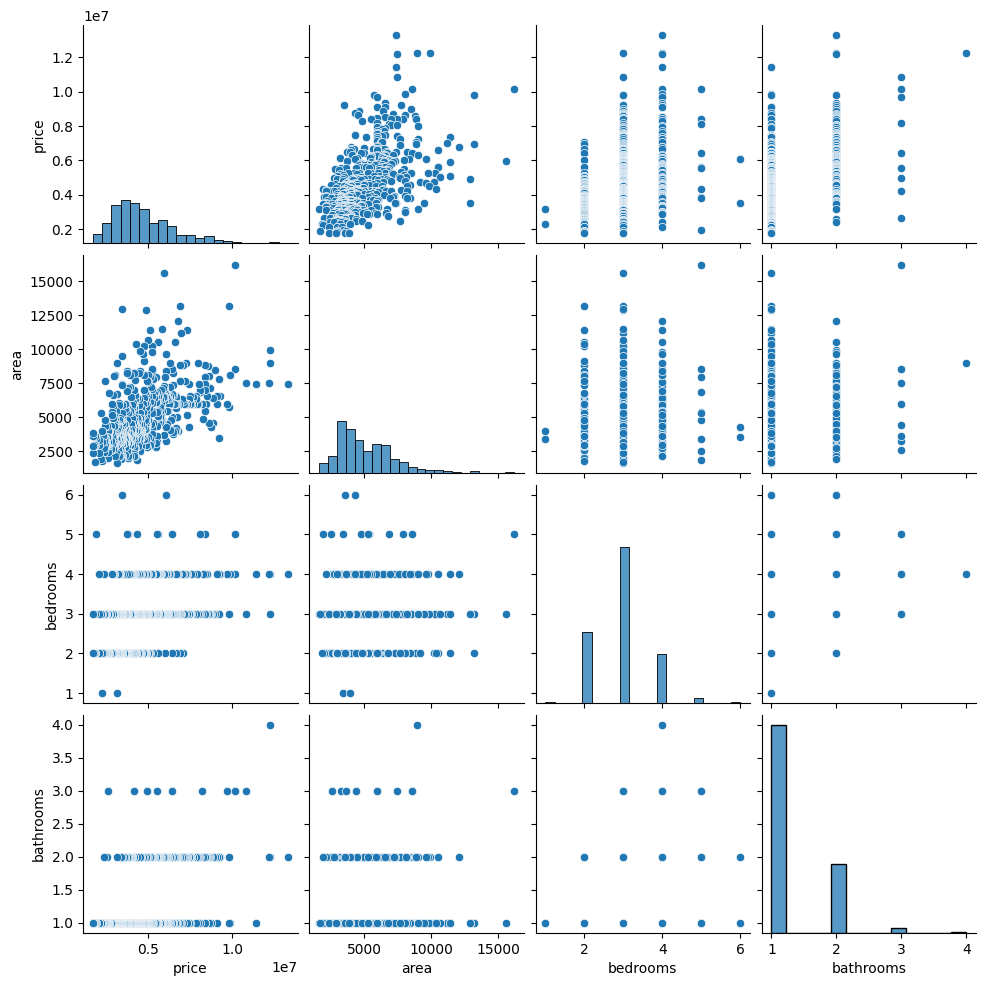

In [39]:
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms']])
plt.show()

In [40]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [41]:
missing_values = df.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [42]:
df = df.fillna(df.mean())

<ipython-input-42-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [43]:
def replace_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = z_scores > threshold
    data[outliers] = data.mean()  
    return data

df['price'] = replace_outliers_zscore(df['price'])

df['area'] = replace_outliers_zscore(df['area'])
df['bedrooms'] = replace_outliers_zscore(df['bedrooms'])
df['bathrooms'] = replace_outliers_zscore(df['bathrooms'])
df['stories'] = replace_outliers_zscore(df['stories'])
df['parking'] = replace_outliers_zscore(df['parking'])

<ipython-input-43-89cd648eeb1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outliers] = data.mean()


In [44]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [45]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 1770416764239.6123
Root Mean Squared Error (RMSE): 1330570.0899387496
Mean Absolute Error (MAE): 989118.4021816346
